<a href="https://colab.research.google.com/github/ejpark78/codelab/blob/master/kubeflow/caltech_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 버전 확인

In [ ]:
!python --version

Python 3.6.9


# 케라스 버전 확인

In [ ]:
import keras
keras.__version__

'2.4.3'

# GPU 확인

In [ ]:
!nvidia-smi

Mon Sep 14 09:22:21 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 파이썬 라이브러리 버전 확인

In [ ]:
!pip3 freeze

absl-py==0.8.1
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
argon2-cffi==20.1.0
asgiref==3.2.10
astor==0.8.1
astropy==4.0.1.post1
astunparse==1.6.3
atari-py==0.2.6
atomicwrites==1.4.0
attrs==20.1.0
audioread==2.1.8
autograd==1.3
Babel==2.8.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.1.5
blis==0.4.1
bokeh==2.1.1
boto==2.49.0
boto3==1.14.48
botocore==1.17.48
Bottleneck==1.3.2
branca==0.4.1
bs4==0.0.1
CacheControl==0.12.6
cachetools==4.1.1
catalogue==1.0.0
certifi==2020.6.20
cffi==1.14.2
chainer==7.4.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.4.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.1
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cupy-cuda101==7.4.0
cvxopt==1.2.5
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.3
Cython==0.29.21
daft==0.0.4
dask==2.12.0
dataclasses==0.7
datascience==0.10.6
debugpy==1.0.0rc2
decorator==4.4.2
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.2
distributed==1.25.3
Django==3

# 구글 드라이브 연결

In [ ]:
from google.colab import drive

drive.mount('/drive')

Mounted at /drive


In [ ]:
!ls "/drive/My Drive/kubeflow"

caltech101  caltech101.zip  caltech_CNN.ipynb


In [ ]:
!mkdir -p "/drive/My Drive/kubeflow/caltech101"

In [ ]:
!unzip "/drive/My Drive/kubeflow/caltech101.zip" -d "/drive/My Drive/kubeflow/caltech101/"

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /drive/My Drive/kubeflow/caltech101/sunflower/image_0014.jpg  
  inflating: /drive/My Drive/kubeflow/caltech101/sunflower/image_0062.jpg  
  inflating: /drive/My Drive/kubeflow/caltech101/ibis/image_0058.jpg  
  inflating: /drive/My Drive/kubeflow/caltech101/flamingo/image_0032.jpg  
  inflating: /drive/My Drive/kubeflow/caltech101/snoopy/image_0022.jpg  
  inflating: /drive/My Drive/kubeflow/caltech101/starfish/image_0027.jpg  
  inflating: /drive/My Drive/kubeflow/caltech101/menorah/image_0016.jpg  
  inflating: /drive/My Drive/kubeflow/caltech101/starfish/image_0022.jpg  
  inflating: /drive/My Drive/kubeflow/caltech101/hedgehog/image_0029.jpg  
  inflating: /drive/My Drive/kubeflow/caltech101/beaver/image_0007.jpg  
  inflating: /drive/My Drive/kubeflow/caltech101/dolphin/image_0019.jpg  
  inflating: /drive/My Drive/kubeflow/caltech101/flamingo_head/image_0028.jpg  
  inflating: /drive/My Drive/kubeflow/caltech101/gerenuk/image_0008

 저장된 데이터셋을 학습에 알맞게 준비하도록 하겠습니다. 
 우리는 케라스 라이브러리를 활용할 것입니다. 
 케라스 라이브러리에 있는 ImageDataGenerator를 임포트 해줍니다. 
 또한 옵션에서 validation_split을 20%로 지정해 주겠습니다. 
 이것은 데이터셋 자료들을 자동으로 train : validation = 8 : 2의 비율로 나눠줍니다. 
 rescale 옵션을 통해서 각 픽셀의 rgb 수치를 255로 나눠줍니다. 
 즉 기존의 수치는 0 ~255 였다면 바뀐 수치는 0 ~ l 입니다.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

## train 데이터셋 설정
* train_datagen을 ImageDataGenerator 클래스로 위에서 선언하였습니다. ImageDataGenerator는 '.flow', '.flow_from_directory', '.flow_from_dataframe' 등을 사용할 수 있습니다. 우리가 사용하는 데이터셋은 폴더별로 분류되어 있기 때문에 flow_from_directory를 사용하는 것이 가장 간편합니다.
* 데이터셋이 존재하는 폴더 경로를지정해 줍니다. '/drive/My Drive/kubeflow/caltech101'입니다.
* target_size및 batch_size를 위에서 설정한 사이즈로 지정합니다.
* 총 101개의 종류를 분류하는 것이기 때문에 binary가 아닌 categorical로
설정합니다.
* subset은 training으로 지정합니다. 

In [ ]:
batch_size = 16
input_image_size = (200, 200)
data_path = '/drive/My Drive/kubeflow/caltech101'

train_generator = train_datagen.flow_from_directory(
    data_path,
    batch_size=batch_size,
    target_size=input_image_size,
    class_mode='categorical',
    subset='training'
)

Found 6982 images belonging to 101 classes.


## validation 데이터셋을 설정

In [ ]:
validation_generator = train_datagen.flow_from_directory(
    data_path,
    batch_size=batch_size,
    target_size=input_image_size,
    class_mode='categorical',
    subset='validation'
)

Found 1695 images belonging to 101 classes.


# CNN(Convolutional Neural Network) 모델 구축

In [ ]:
from keras.layers import Dense, Input, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Model, Sequential

* Sequential을 선언하고 여기에 레이어를 하나씩 쌓아나가겠습니다.
* 먼저 Conv2D 레이어를 add 해줍니다. 
* 옵션 설정을 통해 컨볼루션 필터의 수, 컨볼루션 커널의 행과 열을 설정할 수 있으며, 그 외에 패딩 방법, input_shape, 활성화 함수 등을 설정할 수 있습니다.
* 여기에서는 필터 32개, 커널 3행 3열 활성화 함수 relu, input_shape은 위에서 설정한 이미지 사이즈인 (200, 200)으로 맞추며 흑백이 아닌 RGB이기 때문에 총 3
개의 색영역이 존재하므로 (200, 200, 3)으로 설정해 줍니다.
* 그 후 폴링 레이어를 더해줍니다. 
* 여기에서는 최대값을 뽑아내는 MaxPooling2D 클래스를 적용해 주겠습니다. 
* 폴링 필터는 (2, 2)로 설정했습니다.

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

* 적당히 모델을 쌓았다고 생각이 되므로 전결합층(FC : fully connected layer)을
설정해 줍니다. 
* 위에서는 2차원으로 자료를 다루었으므로 FC 레이어에 전달하기 위해 1차원으로 바꿔줘야 합니다. 이때 Flatten 레이어를 사용합니다.
* 이어서 Dense 레이어를 통해 전결합층을 구축합니다. 
* 또한 위에서 말한 것처럼 활성화 함수를 relu가 아닌 sigmoid로 설정했습니다.
* Dropout 레이어는 과적합을 방지하기 위해 설정해 줍니다. dropout의 비율은 설
정할 수 있습니다. 여기에서는 0.5 로 설정해 주었습니다.
* Dense 레이어를 한 번 더 설정하고 최종적으로 판별할 이미지의 종류가 101가지
클래스이기 때문에 옵션을 101로 설정해 줍니다. 또한 활성화 함수는 softmax로
설정해줍니다.
* 마지막으로 model.summary()를 통해 모델 구조가 제대로 쌓아졌는지 출력해 보도록하겠습니다.

In [ ]:
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(101))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

# 데이터셋 학습

* optimizer: https://sacko.tistory.com/42

![optimizer](https://image.slidesharecdn.com/random-170910154045/95/-49-638.jpg?cb=1505089848)

In [ ]:
from keras import optimizers

model.compile(
  optimizer=optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'] 
)

학습이 충분히 이루어져서 더 이상 진행할 필요가 없을 때는 학습을 자동으로 종료해 주는 early stop 옵션을 걸도록 하겠습니다.

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=15, mode='auto', monitor='val_acc')

hist = model.fit_generator(
    train_generator, 
    epochs=100, 
    callbacks=[early_stopping],
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator, 
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
436/436 [==============================] - 1715s 4s/step - loss: 3.3452 - acc: 0.3147 - val_loss: 2.6545 - val_acc: 0.4336
Epoch 2/100
436/436 [==============================] - 33s 75ms/step - loss: 2.0062 - acc: 0.5294 - val_loss: 1.9457 - val_acc: 0.5493
Epoch 3/100
436/436 [==============================] - 32s 74ms/step - loss: 1.1328 - acc: 0.7209 - val_loss: 1.6990 - val_acc: 0.5976
Epoch 4/100
436/436 [==============================] - 33s 76ms/step - loss: 0.5377 - acc: 0.8820 - val_loss: 1.6234 - val_acc: 0.6301
Epoch 5/100
436/436 [==============================] - 32s 74ms/step - loss: 0.2279 - acc: 0.9561 - val_loss: 1.5740 - val_acc: 0.6389
Epoch 6/100
436/436 [==============================] - 32s 74ms/step - loss: 0.1022 - acc: 0.9851 - val_loss: 1.5342 - val_acc: 0.6413
Epoch 7/100
436/436 [==============================] - 32s 74ms/step - loss: 0.0558 - acc: 0.9917 - val_loss: 1.49

학습 결과를 시각화하기 위해 matplotlib을 사용하겠습니다.

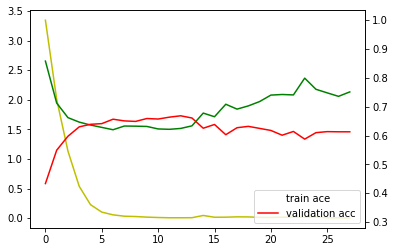

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='validation loss')

acc_ax.plot(hist.history['acc'], ' b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'r', label='validation acc')

plt.legend(['train ace', 'validation acc'])
plt.show()

In [ ]:
model_name = '/drive/My Drive/kubeflow/caltech101.h5'

model.save(model_name) 